In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#Modules for EDA
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

#Modules for ML(Recommendation)
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline


In [5]:
df = pd.read_csv('top100_kdrama.csv')
df.shape

(100, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


In [8]:
synopsis = pd.read_csv('top100_kdrama.csv',usecols=['Synopsis'])
synopsis.head()

,Synopsis
0,Geu Roo is a young autistic man. He works for ...
1,The stories of people going through their days...
2,Although Baek Hee Sung is hiding a dark secret...
3,Everyday is extraordinary for five doctors and...
4,Park Dong Hoon is a middle-aged engineer who i...


In [9]:
df.head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1


In [10]:
kdrama_names = df[['Name']]
kdrama_names.head()

,Name
0,Move to Heaven
1,Hospital Playlist
2,Flower of Evil
3,Hospital Playlist 2
4,My Mister


In [11]:
cols_for_recommend = ['Year of release', 'Number of Episode', 'Network', 'Duration', 'Content Rating', 'Rating']
df = df[cols_for_recommend]
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,Netflix,52 min.,18+ Restricted (violence & profanity),9.2
1,2020,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,9.1
2,2020,16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,9.1
3,2021,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,9.1
4,2018,16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,9.1


In [12]:
networks = []
[networks.append(list(set(network.replace(' ','').split(',')))[0]) for network in df['Network']]
networks[:5]

['Netflix', 'tvN', 'tvN', 'tvN', 'tvN']

In [13]:
df['Network'] = networks
df['Network'].unique()

array(['Netflix', 'tvN', 'jTBC', 'KBS2', 'SBS', 'MBC', 'OCN'],
      dtype=object)

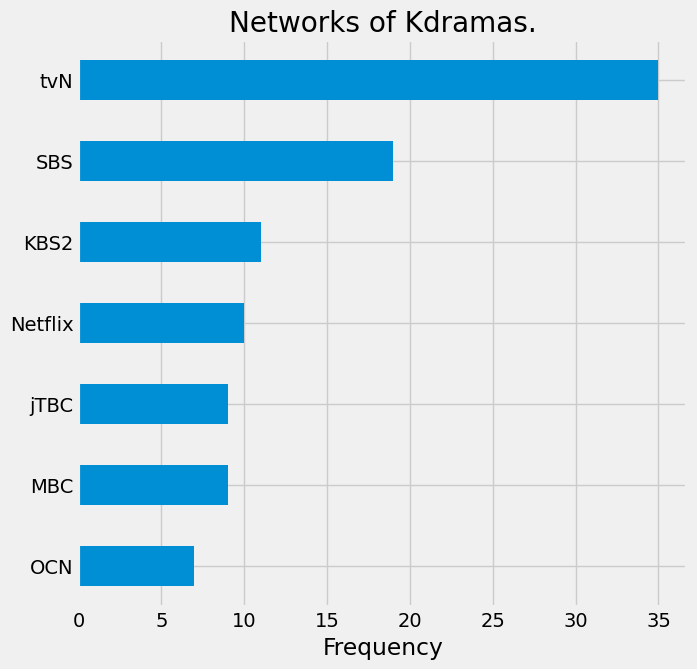

tvN        35
SBS        19
KBS2       11
Netflix    10
jTBC        9
MBC         9
OCN         7
Name: Network, dtype: int64

In [14]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.show()

df['Network'].value_counts()

In [15]:
df['Network'].replace(['OCN','Viki'],['Others','Others'],inplace=True)

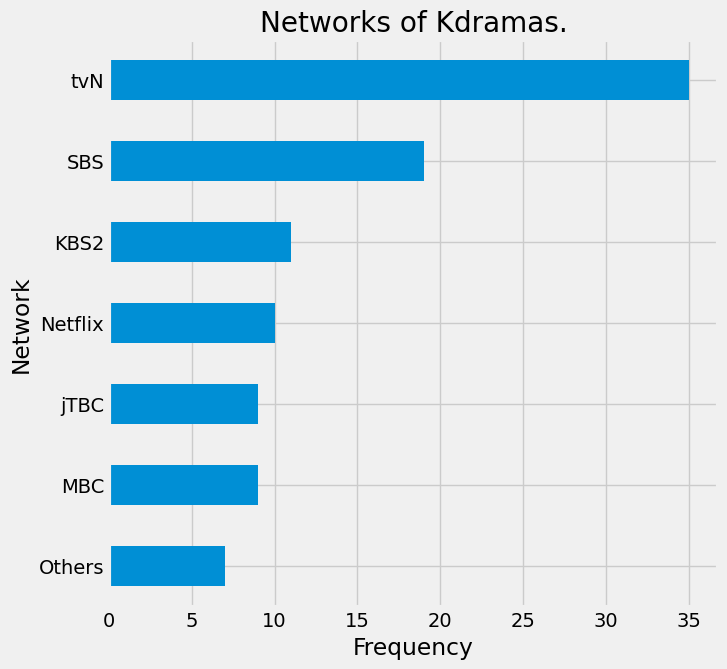

tvN        35
SBS        19
KBS2       11
Netflix    10
jTBC        9
MBC         9
Others      7
Name: Network, dtype: int64

In [16]:
plt.figure(figsize=(7,7))

df['Network'].value_counts().plot(kind='barh')

plt.gca().invert_yaxis()
plt.title("Networks of Kdramas.")
plt.xlabel('Frequency')
plt.ylabel('Network')
plt.show()

df['Network'].value_counts()

In [17]:
df['Duration'] = df['Duration'].str.replace('[A-Za-z]\D+','',regex=True)
df['Duration'].head()

0      52 
1    1 30 
2    1 10 
3    1 40 
4    1 17 
Name: Duration, dtype: object

In [18]:
df['Duration'] = df['Duration'].str.replace(' ','',regex=True)
df['Duration'] = pd.to_numeric(df['Duration'])
df['Duration'].head()

0     52
1    130
2    110
3    140
4    117
Name: Duration, dtype: int64

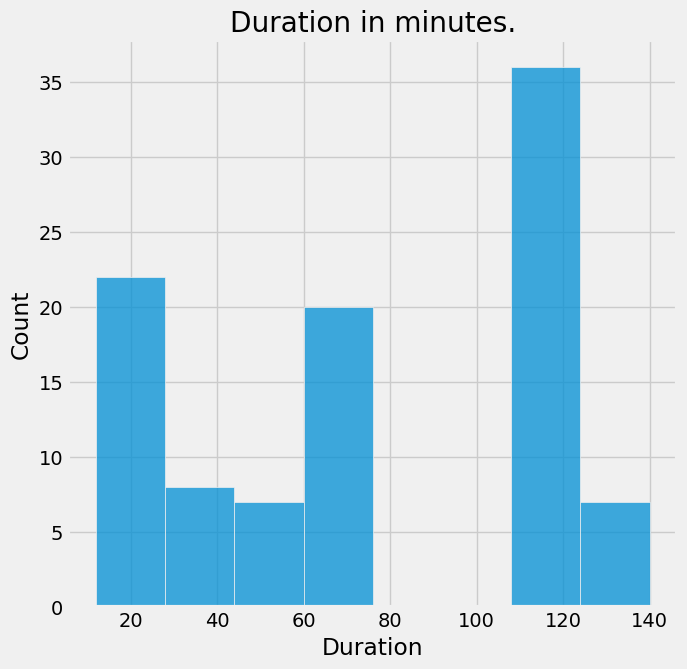

In [19]:
plt.figure(figsize=(7,7))
sns.histplot(data=df['Duration'])
plt.title('Duration in minutes.')
plt.show()

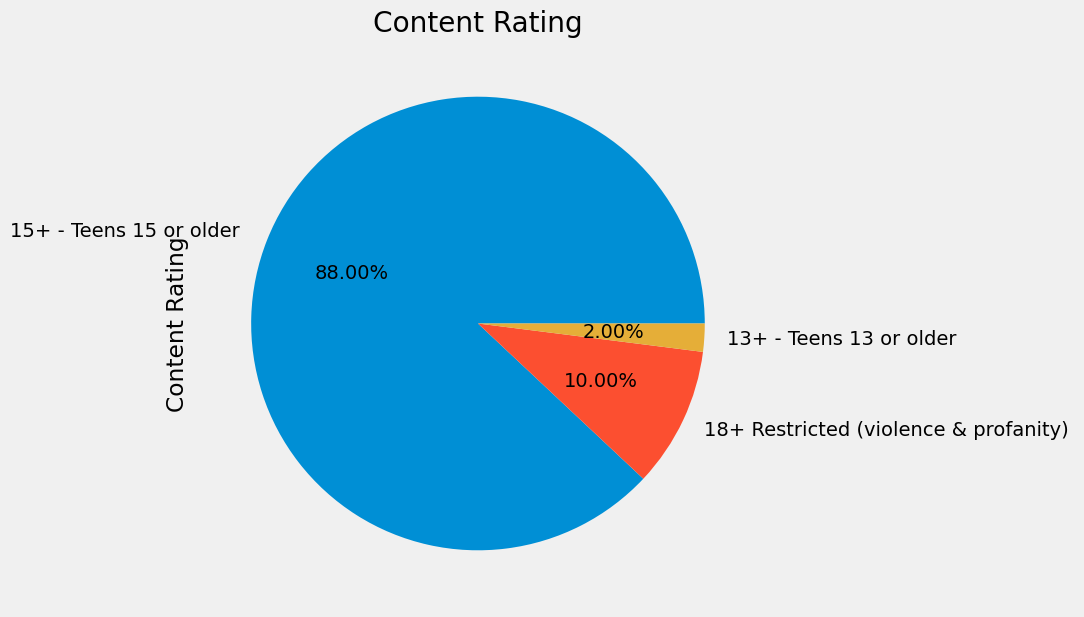

In [20]:
plt.figure(figsize=(7,7))
df['Content Rating'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Content Rating")
plt.show()

In [21]:
df['Content Rating'].value_counts()

15+ - Teens 15 or older                   88
18+ Restricted (violence & profanity)     10
13+ - Teens 13 or older                    2
Name: Content Rating, dtype: int64

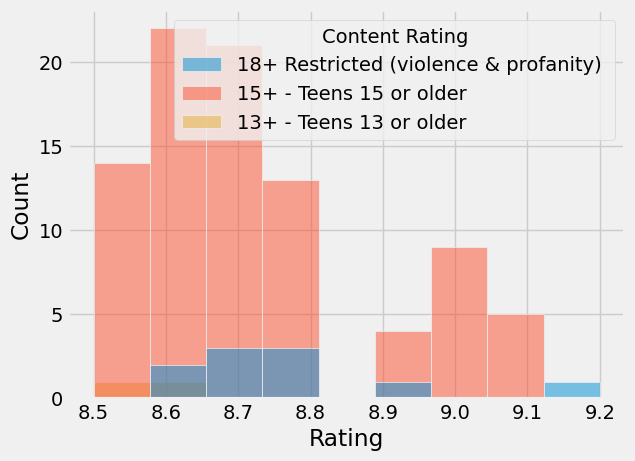

In [22]:
sns.histplot(data=df[['Rating','Content Rating']],x='Rating',hue='Content Rating')
plt.show()

In [23]:
df[['Rating']].describe()

,Rating
count,100.000000
mean,8.723000
std,0.174573
min,8.500000
25%,8.600000
50%,8.700000
75%,8.800000
max,9.200000


In [24]:
df.head()

,Year of release,Number of Episode,Network,Duration,Content Rating,Rating
0,2021,10,Netflix,52,18+ Restricted (violence & profanity),9.2
1,2020,12,tvN,130,15+ - Teens 15 or older,9.1
2,2020,16,tvN,110,15+ - Teens 15 or older,9.1
3,2021,12,tvN,140,15+ - Teens 15 or older,9.1
4,2018,16,tvN,117,15+ - Teens 15 or older,9.1


In [25]:
cols_to_encode = ['Network','Content Rating']
dummies = pd.get_dummies(df[cols_to_encode],drop_first=True)
dummies.head()

,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,1,0
3,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,1,0


In [26]:
df.drop(cols_to_encode, axis=1,inplace=True)
df.head()

,Year of release,Number of Episode,Duration,Rating
0,2021,10,52,9.2
1,2020,12,130,9.1
2,2020,16,110,9.1
3,2021,12,140,9.1
4,2018,16,117,9.1


In [27]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df)

In [28]:
i=0
for col in df.columns:
    df[col] = scalled[:,i]
    i += 1

In [29]:
df.head()

,Year of release,Number of Episode,Duration,Rating
0,1.000000,0.042553,0.312500,1.000000
1,0.944444,0.063830,0.921875,0.857143
2,0.944444,0.106383,0.765625,0.857143
3,1.000000,0.063830,1.000000,0.857143
4,0.833333,0.106383,0.820312,0.857143


In [30]:
new_df = pd.concat([df, dummies],axis=1)
new_df.shape

(100, 12)

In [31]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
0,1.000000,0.042553,0.312500,1.000000,0,1,0,0,0,0,0,1
1,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,1,0
2,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,1,1,0
3,1.000000,0.063830,1.000000,0.857143,0,0,0,0,0,1,1,0
4,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,1,1,0


In [32]:
kdrama_names['Name'].loc[23]='kingdom'

In [33]:
new_df.index = [drama for drama in kdrama_names['Name']]
synopsis.index = [drama for drama in kdrama_names['Name']]

In [34]:
new_df.head()

,Year of release,Number of Episode,Duration,Rating,Network_MBC,Network_Netflix,Network_Others,Network_SBS,Network_jTBC,Network_tvN,Content Rating_15+ - Teens 15 or older,Content Rating_18+ Restricted (violence & profanity)
Move to Heaven,1.000000,0.042553,0.312500,1.000000,0,1,0,0,0,0,0,1
Hospital Playlist,0.944444,0.063830,0.921875,0.857143,0,0,0,0,0,1,1,0
Flower of Evil,0.944444,0.106383,0.765625,0.857143,0,0,0,0,0,1,1,0
Hospital Playlist 2,1.000000,0.063830,1.000000,0.857143,0,0,0,0,0,1,1,0
My Mister,0.833333,0.106383,0.820312,0.857143,0,0,0,0,0,1,1,0


In [35]:
def getRecommendation_dramas_for(drama_name,no_of_recommend=5,get_similarity_rate=False):

    kn = NearestNeighbors(n_neighbors=no_of_recommend+1,metric='manhattan')
    kn.fit(new_df)

    distances, indices = kn.kneighbors(new_df.loc[drama_name])

    print(f'Similar K-Dramas for "{drama_name[0]}":')
    nearest_dramas = [kdrama_names.loc[i][0] for i in indices.flatten()][1:]
    if not get_similarity_rate:
        return nearest_dramas
    sim_rates = []
    synopsis_ = []
    for drama in nearest_dramas:
        synopsis_.append(synopsis.loc[drama][0])
        sim = cosine_similarity(new_df.loc[drama_name],[new_df.loc[drama]]).flatten()
        sim_rates.append(sim[0])
    recommended_dramas = pd.DataFrame({'Recommended Drama':nearest_dramas,'Similarity':sim_rates,'Synopsis':synopsis_})
    recommended_dramas.sort_values(by='Similarity',ascending=True)
    return recommended_dramas

In [36]:
rd1 = kdrama_names.loc[0]
rd1

Name    Move to Heaven
Name: 0, dtype: object

In [37]:
getRecommendation_dramas_for(rd1,no_of_recommend=5)

Similar K-Dramas for "Move to Heaven":


['Kingdom', 'Kingdom', 'My Name', 'Sweet Home', 'Squid Game']

In [38]:
rd2 = kdrama_names.loc[10]
rd2

Name    Signal
Name: 10, dtype: object

In [39]:
getRecommendation_dramas_for(rd2,get_similarity_rate=True)

Similar K-Dramas for "Signal":


,Recommended Drama,Similarity,Synopsis
0,It's Okay to Not Be Okay,0.994766,Moon Gang Tae is a community health worker at ...
1,Stranger,0.996784,Hwang Shi Mok underwent brain surgery as a chi...
2,Crash Landing on You,0.996966,"After getting into a paragliding accident, Sou..."
3,My Mister,0.997236,Park Dong Hoon is a middle-aged engineer who i...
4,Reply 1988,0.995079,"Five childhood friends, who all live in the sa..."


In [40]:
rd3 = kdrama_names.loc[1]
rd3

Name    Hospital Playlist
Name: 1, dtype: object

In [41]:
getRecommendation_dramas_for(rd3,get_similarity_rate=True)

Similar K-Dramas for "Hospital Playlist":


,Recommended Drama,Similarity,Synopsis
0,Hospital Playlist 2,0.999395,Everyday is extraordinary for five doctors and...
1,Flower of Evil,0.997420,Although Baek Hee Sung is hiding a dark secret...
2,Prison Playbook,0.996988,"Kim Je Hyuk, a famous baseball player, is arre..."
3,My Mister,0.998064,Park Dong Hoon is a middle-aged engineer who i...
4,Crash Landing on You,0.997901,"After getting into a paragliding accident, Sou..."


In [42]:
def print_similiar_drama_Synopsis(recommended_df):
    rdf = recommended_df
    rdf_cols = rdf['Synopsis']
    dramas = rdf['Recommended Drama']
    for i in range(5):
        print(dramas[i])
        print(rdf_cols[i])
        print('\n')

In [43]:
rd4 = kdrama_names.loc[8]
rd4

Name    Mr. Queen
Name: 8, dtype: object

In [44]:
rdf4 = getRecommendation_dramas_for(rd4,no_of_recommend=10,get_similarity_rate=True)
print_similiar_drama_Synopsis(rdf4)

Similar K-Dramas for "Mr. Queen":
It's Okay to Not Be Okay
Moon Gang Tae is a community health worker at a psychiatric ward who was blessed with everything including a great body, smarts, ability to sympathize with others, patience, ability to react quickly, stamina, and more. Meanwhile, Ko Moon Young is a popular writer of children’s literature who, due to suffering from an antisocial personality disorder, seems extremely selfish, arrogant, and rude.


Vincenzo
At the age of eight, Park Joo Hyeong went to Italy after being adopted. Now an adult, he is known as Vincenzo Cassano to the Mafia, who employ him as a consigliere. Because mafia factions are at war with each other, he flees to South Korea, where he gets involved with Lawyer Hong Cha Young. She is the type of attorney who will do anything to win a case. Now back at his motherland, he gives an unrivaled conglomerate a taste of its own medicine with a side of justice.


Crash Landing on You
After getting into a paragliding accide

In [45]:
rd5 = kdrama_names.loc[99]
rd5

Name    Fight For My Way
Name: 99, dtype: object

In [46]:
getRecommendation_dramas_for(rd5,no_of_recommend=5,get_similarity_rate=True)

Similar K-Dramas for "Fight For My Way":


,Recommended Drama,Similarity,Synopsis
0,Good Manager,0.993771,Can corporate politics turn a bad person into ...
1,Descendants of the Sun,0.975878,A love story that develops between a surgeon a...
2,When the Camellia Blooms,0.970180,Dong Baek is a single mother living in the sma...
3,Dali and the Cocky Prince,0.956293,"As a young boy, Moo Hak grew up in the market ..."
4,Go Back Couple,0.962434,"38-years-old married couple, Choi Ban Do and M..."
